<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/Kmeans_Clustering_Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. K-means Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(5)
kmeans = KMeans(n_clusters=3)

#n_clusters 클러스터의 개수, 기본은 8
#n_jobs 병렬 처리 개수
#algorithm: full(EM방식), elkan(효율적 방식), auto(dense 자료에 elkan, sparse에 full)

#사용 함수
kmeans.fit(X)	#클러스터링
kmeans.fit_predict(X)	#클러스터 중심 계산 후 각 샘플의 클러스터를 예측, kmeans.labels_와 동일
kmeans.get_params()	#파라미터 출력
kmeans.predict(X[0:5,])	#입력된 X값들이 어떤 클러스터에 속할 지 계산
kmeans.predict([[0, 0, 0, 0], [1,1,4, 4]])

kmeans.transform(X)[1,]	#클러스터 중심으로부터의 거리로 변환된 값
X[1,]

#결과 활용
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)		#각 클러스터내에서 센터와 각 자료 사이 거리 합의 제곱

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
78.851441426146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#CSV를 읽은 후 k-means 클러스터링
csv_data = pd.read_csv("creditset.csv")
csv_data = csv_data.iloc[:, [1,2,3] ]	#2,3,4 열만 선택

kmeans = KMeans(n_clusters=3)
kmeans.fit(csv_data)	#클러스터링
kmeans.predict(csv_data)
kmeans.get_params()
kmeans.inertia_

#n_clusters: 클러스터의 개수
#init: 초기 중심을 설정하는 방법. 예를 들면 'k-means++'는 더 효율적인 초기화를 제공합니다.
#n_init: 초기 중심을 몇 번 다르게 설정하여 K-means 알고리즘을 실행할 것인지를 결정하는 반복 횟수
#max_iter: 각 반복 단계에서 최적화를 반복할 횟수
#tol: 수렴을 판단하기 위한 허용 오차

#반복문으로 클러스터 개수별 K-means 비교하기
for numcl in [3,6,9]:
	kmeans2 = KMeans(n_clusters=numcl)
	kmeans2.fit(csv_data)
	print(kmeans2.inertia_)

59764499521.70596
26245031358.310913
16923861168.118694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#정규화:데이터 크기를 변환
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(csv_data)

for numcl in [3,6,9]:
	kmeans3 = KMeans(n_clusters=numcl)
	kmeans3.fit(scaled)
	print(kmeans3.inertia_)

209.13710609351799
117.3878669884119
87.21381306283396


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


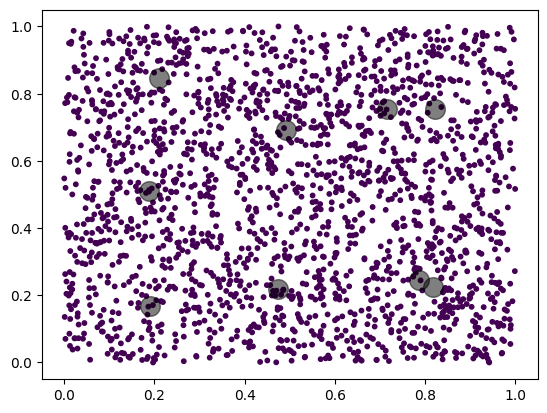

In [ ]:
#matplotlib으로 시각화
import matplotlib.pyplot as plt
scaled_df = pd.DataFrame(scaled, columns=csv_data.columns)
plt.scatter(scaled_df['income'], scaled_df['age'], c=kmeans.predict(scaled_df), s=10 )
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

#2.Agglomerative Clustering ( = Hierachical Clustering)

In [ ]:
from time import time
import numpy as np
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=10)
#n_clusters 클러스터 개수, 초기값 2
#affinity 거리 측정 방식, 기본값 euclidean
#linkage ward, complete, average, 기본값은 ward (ward는 거리가 euclidean에서 가능)

hclust.fit(X)
hclust.fit_predict(X)
hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과

array([9, 5, 5, 5, 9, 3, 5, 9, 5, 5, 3, 5, 5, 5, 3, 3, 3, 9, 3, 9, 3, 9,
       5, 9, 5, 5, 9, 9, 9, 5, 5, 3, 3, 3, 5, 5, 3, 9, 5, 9, 9, 5, 5, 9,
       9, 5, 9, 5, 3, 9, 8, 6, 8, 0, 8, 0, 6, 7, 8, 0, 7, 6, 0, 6, 0, 8,
       0, 0, 2, 0, 6, 6, 2, 6, 6, 8, 8, 4, 6, 0, 0, 0, 0, 2, 0, 6, 8, 2,
       0, 0, 0, 6, 0, 7, 0, 0, 0, 6, 7, 0, 4, 2, 1, 4, 4, 1, 0, 1, 4, 1,
       4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 6, 4, 1, 1, 1,
       4, 2, 2, 1, 4, 4, 6, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 6])

In [ ]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X)
    print("%s : %.2fs" % (linkage, time() - t0))
    print(clustering.get_params())

ward : 0.00s
{'affinity': 'deprecated', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'ward', 'memory': None, 'metric': None, 'n_clusters': 10}
average : 0.00s
{'affinity': 'deprecated', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'average', 'memory': None, 'metric': None, 'n_clusters': 10}
complete : 0.00s
{'affinity': 'deprecated', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'complete', 'memory': None, 'metric': None, 'n_clusters': 10}


In [ ]:
#CSV를 읽은 후 Agglomerative 클러스터링
from pandas import read_csv
csv_data = read_csv("creditset.csv")	#또는 원하시는 경로를 지정해주세요. 예: c:/creditset.csv
csv_data = csv_data.iloc[:, [1,2,3]]	#2,3,4 열만 선택
print(csv_data.shape)

hclust = AgglomerativeClustering(linkage='ward', n_clusters=2)
hclust.fit(csv_data)
hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과 출력

hclust = AgglomerativeClustering(linkage='ward', n_clusters=2)
hclust.fit(csv_data)
hclust.get_params()
hclust.labels_

(2000, 3)


array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=10)
model2.fit(scaled)
model2.n_clusters
model2.labels_
model2.inertia_

AttributeError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


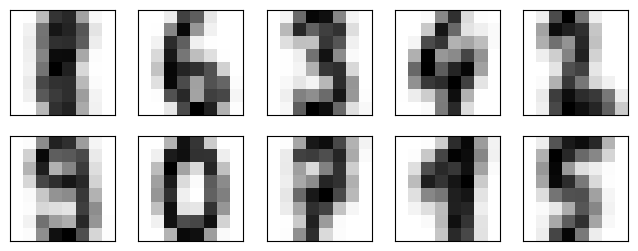

In [ ]:
#MNIST digit 샘플 데이터
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
digits.data.shape

#0~9의 숫자이므로 10개 군집
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(digits.data)
kmeans.cluster_centers_.shape

# 시각화
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = kmeans.cluster_centers_.reshape(10, 8, 8)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

In [ ]:
#MNIST fashion 샘플 데이터
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#10개의 아이템 범주
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit( test_images.reshape(-1, 28*28) )
kmeans.cluster_centers_.shape

4422102/4422102 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 784)

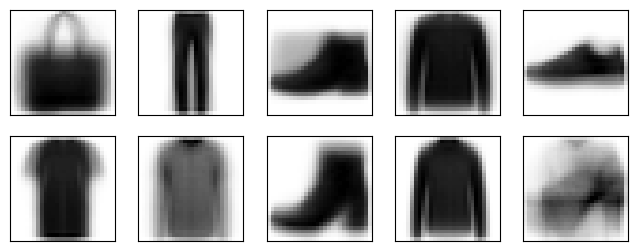

In [ ]:
# 시각화
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = kmeans.cluster_centers_.reshape(10, 28, 28)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

#interpolation='nearest' : 이미지를 픽셀 단위로
#cmap=plt.cm.binary : 흑백 이미지로